## PyMc (PyMc3)
: 확률적 프로그래밍, 즉 베이즈 기법을 사용한 시뮬레이션을 이용해 통계 문제를 해결하기 위한 프레임워크 제공.

## 1. 모듈 임포트

In [ ]:
import pymc3 as mc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

## 2. 베이즈 통계

### 베이즈 정리  

P(A): 사건 A의 무조건 확률,  
P(B): 사건 B의 무조건 확률,  
P(A|B): 사건 B가 참일 경우 사건 A의 조건부 확률,   
P(B|A): 사건 A가 참일 경우 사건 B의 조건부 확률

### P(A|B)P(B) = P(B|A)P(A)  

== P(A∩B)

## 3. 모델 정의
- mc.Normal: 정규 분포 확률 변수
- mc.Bernouli: 이산 베르누이 분포 확률 변수
- mc.Uniform: 균일 분포된 확률 변수
- mc.Gamma:  감마 분포 확률 변수

In [ ]:
mu = 4.0  # 평균
sigma = 2.0  # 분산
model = mc.Model()  # 모델 생성

In [ ]:
with model:
  mc.Normal('X', mu, tau=1/sigma**2)  #(변수 이름, 정규분포의 평균, 정밀도(1/분산^2))

In [ ]:
model.vars  # 모델에 존재하는 확률 변수 검사

[X ~ Normal]

In [ ]:
start = dict(X=2)
with model:
  step = mc.Metropolis()
  trace = mc.sample(10000, start=start, step=step)  # 표본 추출

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


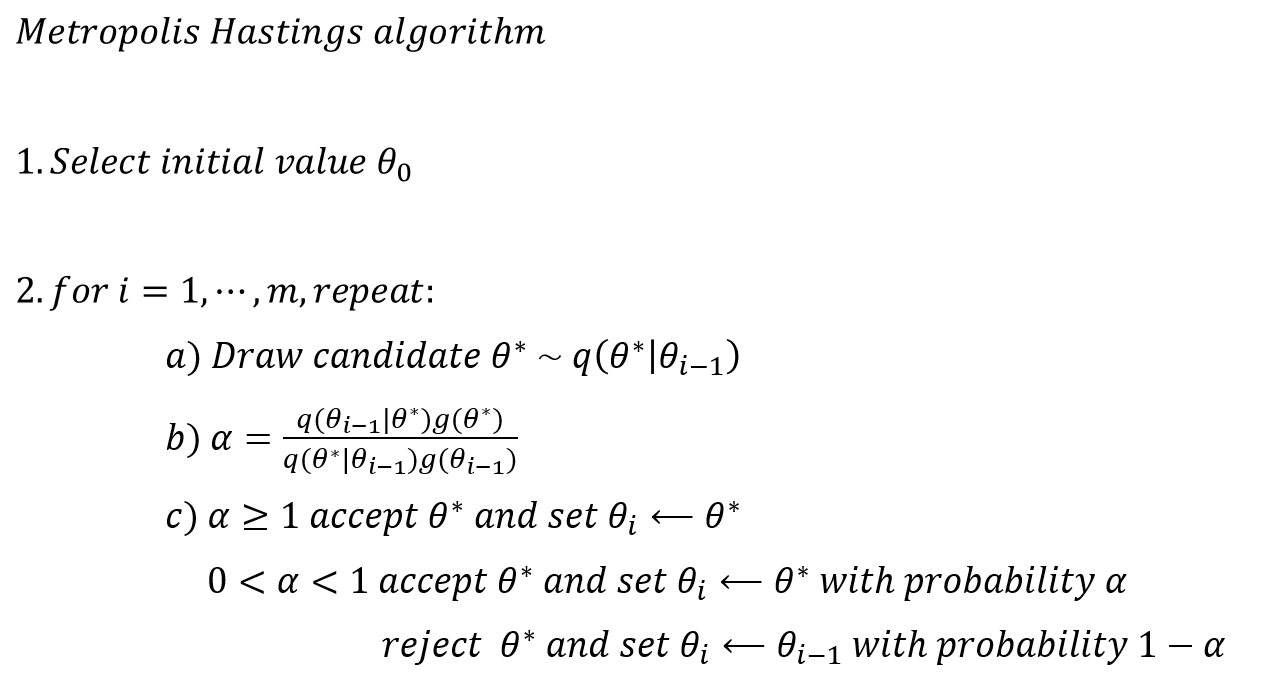

In [ ]:
X = trace.get_values("X") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Probability distribution')

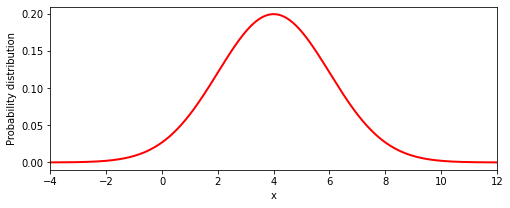

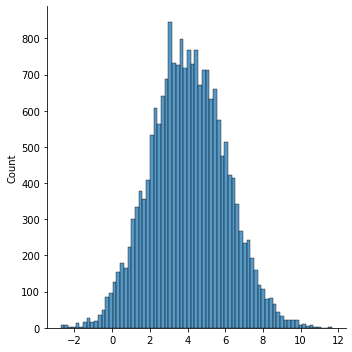

In [ ]:
x = np.linspace(-4, 12, 1000)
y = stats.norm(mu, sigma).pdf(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'r', lw=2)
sns.displot(X, ax=ax)
ax.set_xlim(-4, 12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


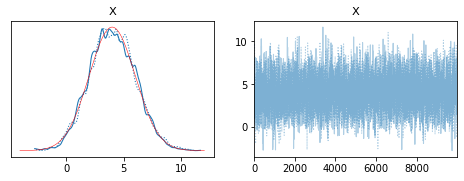

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), squeeze=False)
mc.traceplot(trace, axes=axes)
axes[0, 0].plot(x, y, 'r', lw=0.5)

In [ ]:
model = mc.Model()
with model:
  mean = mc.Normal('mean', 3.0)
  sigma = mc.HalfNormal('sigma', sd=1.0)
  X = mc.Normal('X', mean, sd=sigma)

In [ ]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution, X ~ Normal]

In [ ]:
with model:
  start = mc.find_MAP()
start

{'mean': array(3.),
 'sigma_log__': array(-674.07720733),
 'X': array(3.),
 'sigma': array(1.78644019e-293)}

In [ ]:
with model:
  step = mc.Metropolis()
  trace = mc.sample(100000, start=start, step=step)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  This is separate from the ipykernel package so we can avoid doing imports until


SamplingError: ignored

In [ ]:
trace.get_values('sigma').mean()

KeyError: ignored

In [ ]:
X = trace.get_values('X')
X.mean()

4.041243241526346

In [ ]:
trace.get_values('X').std()

1.9896855702841012

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


KeyError: ignored

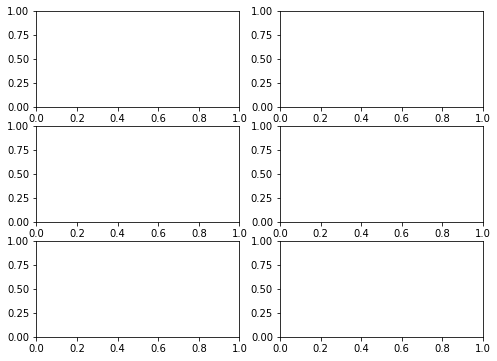

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace, var_names=['mean', 'sigma', 'X'], axes=axes)

### 사후 분포 표본 추출
: 관측값을 고려한 후 사전 분포를 업데이트한 후의 모델 변수 확률 분포를 나타내는 사후 분포로 부터 표본을 추출.

In [ ]:
mu = 2.5
s = 1.5
data = stats.norm(mu, s).rvs(100)

In [ ]:
with mc.Model() as model:
  mean = mc.Normal('mean', 4.0, 1.0)  # true 2.5
  sigma = mc.HalfNormal('sigma', 3.0 * np.sqrt(np.pi/2))  # true 1.5
  X = mc.Normal('X', mean, 1/sigma**2, observed=data)

In [ ]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution]

In [ ]:
with model:
  start = mc.find_MAP()
  step = mc.Metropolis()
  trace = mc.sample(100000, start=start, step=step)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


In [ ]:
start

{'mean': array(2.71193034),
 'sigma_log__': array(-0.18247307),
 'sigma': array(0.83320708)}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6d3f67790>,
      dtype=object)

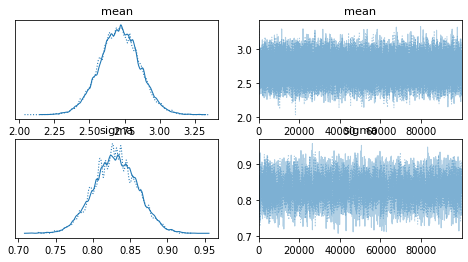

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), squeeze=False)
mc.traceplot(trace, var_names=['mean', 'sigma'], axes=axes)

In [ ]:
mu, trace.get_values('mean').mean()

(2.5, 2.712374568860896)

In [ ]:
s, trace.get_values('sigma').mean()

(1.5, 0.830466877580831)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6d3836490>],
      dtype=object)

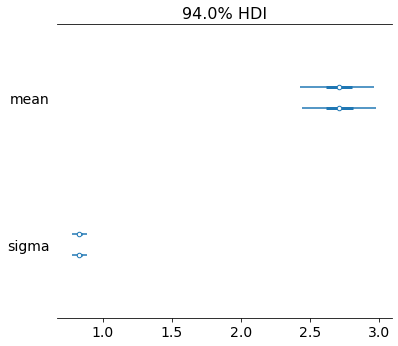

In [ ]:
mc.forestplot(trace, var_names=['mean', 'sigma'])

In [ ]:
mc.summary(trace, var_names=['mean', 'sigma'])

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mean,2.712,0.144,2.433,2.974,0.001,0.001,28852.0,29582.0,1.0
sigma,0.830,0.029,0.775,0.885,0.000,0.000,9094.0,9066.0,1.0


### 선형 회귀

In [ ]:
dataset = sm.datasets.get_rdataset("Davis", "carData")

In [ ]:
data = dataset.data[dataset.data.sex == 'M']
data = data[data.weight < 110]

In [ ]:
data.head(3)

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
3,M,68,177,70.0,175.0
5,M,76,170,76.0,165.0


In [ ]:
model = smf.ols("height ~ weight", data=data)

In [ ]:
result = model.fit()

Text(0, 0.5, 'height')

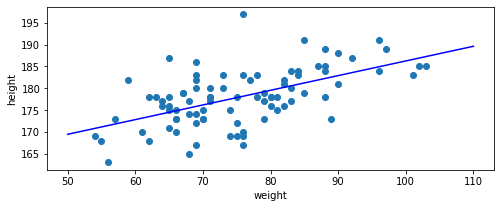

In [ ]:
x = np.linspace(50, 110, 25)
y = result.predict({"weight": x})
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(data.weight, data.height, 'o')
ax.plot(x, y, color='blue')
ax.set_xlabel("weight")
ax.set_ylabel("height")

In [ ]:
with mc.Model() as model:
  sigma = mc.Uniform('sigma', 0, 10)
  intercept = mc.Normal('intercept', 125, sd=30)
  beta = mc.Normal('beta', 0, sd=5)
  height_mu = intercept + beta * data.weight
  mc.Normal('height', mu=height_mu, sd=sigma, observed=data.height)
  predict_height = mc.Normal('predict_height', mu=intercept + beta * x, sd=sigma, shape=len(x))

In [ ]:
model.vars

[sigma_interval__ ~ TransformedDistribution,
 intercept ~ Normal,
 beta ~ Normal,
 predict_height ~ Normal]

In [ ]:
with model:
  start = mc.find_MAP()
  step = mc.NUTS()
  trace = mc.sample(10000, step, start=start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:pymc3:There were 239 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 239 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe49922c390>,
      dtype=object)

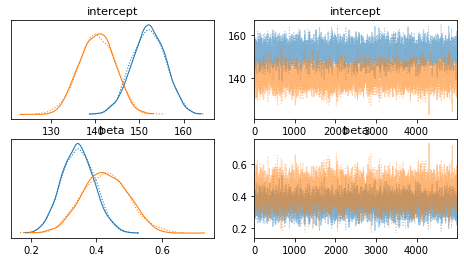

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), squeeze=False)
mc.traceplot(trace, var_names=['intercept', 'beta'], axes=axes)

In [ ]:
intercept = trace.get_values("intercept").mean()
intercept

152.0447458146474

In [ ]:
beta = trace.get_values("beta").mean()
beta

0.3438502909759497

In [ ]:
result.params

Intercept    152.617348
weight         0.336477
dtype: float64

In [ ]:
result.predict({"weight": 90}).values

array([182.90030002])

In [ ]:
weight_index = np.where(x == 90)[0][0]
trace.get_values("predict_height")[:, weight_index].mean()

183.03321916583266

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Probability distribution')

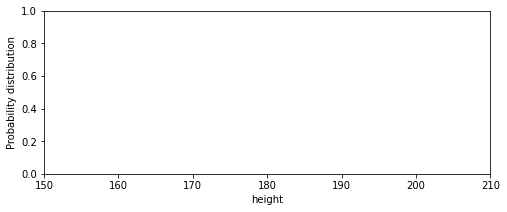

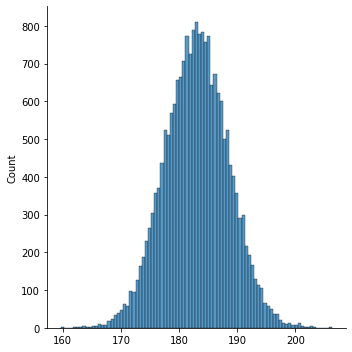

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.displot(trace.get_values("predict_height")[:, weight_index], ax=ax)
ax.set_xlim(150, 210)
ax.set_xlabel("height")
ax.set_ylabel("Probability distribution")

ValueError: ignored

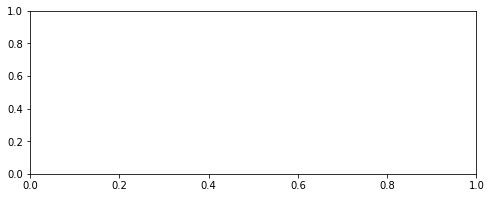

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
for n in range(500, 2000, 1):
  intercept = trace.get_values("intercept")[n]
  beta = trace.get_values("beta")[n]
  ax.plot(x, intercept + beta * x, color='red', lw=0.25, alpha=0.05)
intercept = trace.get_values("intercept").mean()
ax.plot(x, intercept + beta * x, color='k', label="Mean Baysian prediction")
ax.plot(data.weight, data.height, 'o')
ax.plot(x, y, '--', color='blue', label="OLS prediction")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)

In [ ]:
with mc.Model() as model:
  mc.glm.GLM.from_formula('height ~ weight' ,data)
  step = mc.NUTS()
  trace = mc.sample(2000, step)

We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4a64cb5d0>,
      dtype=object)

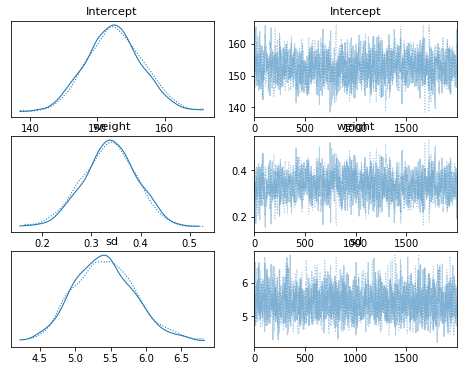

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace, var_names=['Intercept', 'weight', 'sd'], axes=axes)

In [ ]:
data = dataset.data.copy()
data = data[data.weight < 110]
data["sex"] = data["sex"].apply(lambda x: 1 if x == "F" else 0)

In [ ]:
with mc.Model() as model:
  intercept_mu, intercept_sigma = 125, 30
  beta_mu, beta_sigma = 0, 5
  intercept = mc.Normal('intercept', intercept_mu, sd=intercept_sigma, shape=2)
  beta = mc.Normal('beta', beta_mu, sd=beta_sigma, shape=2)
  error = mc.Uniform('error', 0, 10)

  sex_idx = data.sex.values
  height_mu = intercept[sex_idx] + beta[sex_idx] * data.weight

  mc.Normal('height', mu=height_mu, sd=error, observed=data.height)

In [ ]:
model.vars

[intercept ~ Normal, beta ~ Normal, error_interval__ ~ TransformedDistribution]

In [ ]:
with model:
  start = mc.find_MAP()
  step = mc.NUTS()
  trace = mc.sample(5000, step, start=start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe499e45f10>,
      dtype=object)

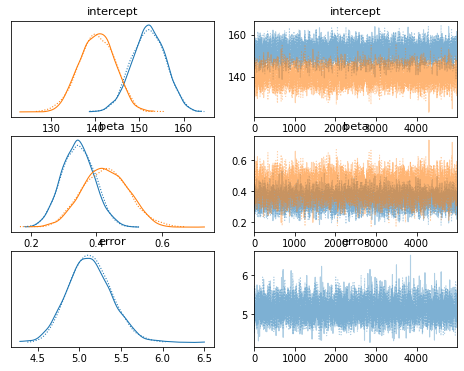

In [ ]:
mc.traceplot(trace, figsize=(8, 6))

In [ ]:
intercept_m, intercept_f = trace.get_values('intercept').mean(axis=0)
beta_m, beta_f = trace.get_values('beta').mean(axis=0)

In [ ]:
intercept = trace.get_values('intercept').mean()
beta = trace.get_values('beta').mean()

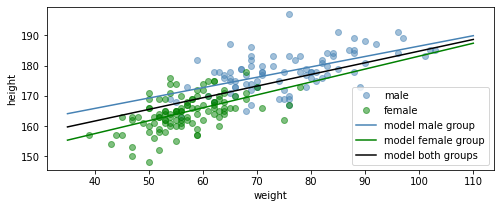

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
mask_m = data.sex == 0
mask_f = data.sex == 1
ax.plot(data.weight[mask_m], data.height[mask_m], 'o', color="steelblue", label="male", alpha=0.5)
ax.plot(data.weight[mask_f], data.height[mask_f], 'o', color="green", label="female", alpha=0.5)
x = np.linspace(35, 110, 50)
ax.plot(x, intercept_m + x * beta_m, color="steelblue", label="model male group")
ax.plot(x, intercept_f + x * beta_f, color="green", label="model female group")
ax.plot(x, intercept + x * beta, color="black", label="model both groups")

ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)